In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("project2_sp24.ipynb")

# Project 2: Climate Change—Temperatures and Precipitation

In this project, you will investigate data on climate change, or the long-term shifts in temperatures and weather patterns!

### Logistics

**Rules.** Don't share your code with anybody but your partner, if you have one. You are welcome to discuss questions with other students, but don't share the answers. The experience of solving the problems in this project will prepare you for exams (and life). If someone asks you for the answer, resist! Instead, you can demonstrate how you would solve a similar problem.

**Support.** You are not alone! Come to office hours and talk to your classmates. If you're ever feeling overwhelmed or don't know how to make progress, email for help.

**Tests.** The tests that are given are **not comprehensive** and passing the tests for a question **does not** mean that you answered the question correctly. Tests usually only check that your table has the correct column labels. However, more tests will be applied to verify the correctness of your submission in order to assign your final score, so be careful and check your work! You might want to create your own checks along the way to see if your answers make sense. Additionally, before you submit, make sure that none of your cells take a very long time to run (several minutes).

**Free Response Questions:** Make sure that you put the answers to the written questions in the indicated cell we provide. **Every free response question should include an explanation** that adequately answers the question.

**Advice.** Develop your answers incrementally. To perform a complicated task, break it up into steps, perform each step on a different line, give a new name to each result, and check that each intermediate result is what you expect. You can add any additional names or functions you want to the provided cells. Make sure that you are using distinct and meaningful variable names throughout the notebook. Along that line, **DO NOT** reuse the variable names that we use when we grade your answers. 

You **never** have to use just one line in this project or any others. Use intermediate variables and multiple lines as much as you would like!

All of the concepts necessary for this project are found in the textbook. If you are stuck on a particular problem, reading through the relevant textbook section often will help clarify the concept.


---

To get started, load `datascience`, `numpy`, `matplotlib`, and `d8error`. Make sure to also run the first cell of this notebook to load `otter`.

In [2]:
# Run this cell to set up the notebook, but please don't change it.
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
np.set_printoptions(legacy='1.13')

import warnings
warnings.simplefilter('ignore')
import d8error

## Part 1: Temperatures

In the following analysis, we will investigate one of the 21st century's most prominent issues: climate change. While the details of climate science are beyond the scope of this course, we can start to learn about climate change just by analyzing public records of different cities' temperature and precipitation over time.

We will analyze a collection of historical daily temperature and precipitation measurements from weather stations in 209 U.S. cities. The dataset was compiled by Yuchuan Lai and David Dzombak [1]; a description of the data from the original authors and the data itself is available [here](https://kilthub.cmu.edu/articles/dataset/Compiled_daily_temperature_and_precipitation_data_for_the_U_S_cities/7890488). 

[1] Lai, Yuchuan; Dzombak, David (2019): Compiled historical daily temperature and precipitation data for selected 209 U.S. cities. Carnegie Mellon University. Dataset.

### Part 1, Section 1: Cities

Run the following cell to load information about the `cities` and preview the first few rows.

In [3]:
cities = Table.read_table('city.csv', index_col=0)
cities.show(5)

Name,ID,Latitude,Longitude,Stn.Name,Stn.stDate,Stn.edDate
Cheyenne,USW00024018,41.1519,-104.806,CHEYENNE WBO,1871-01-01,1935-08-31
Cheyenne,USW00024018,41.1519,-104.806,CHEYENNE MUNICIPAL ARPT,1935-09-01,2021-12-31
Wausau,USW00014897,44.9258,-89.6256,Wausau Record Herald,1896-01-01,1941-12-31
Wausau,USW00014897,44.9258,-89.6256,Wausau Airport,1942-01-01,2021-12-31
Hayward,USW00094973,46.0261,-91.4442,Hayward RS,1894-01-01,1998-03-31


The `cities` table has one row per weather station and the following columns:

1. `"Name"`: The name of the US city
2. `"ID"`: The unique identifier for the US city
3. `"Latitude"`: The latitude of the US city (measured in degrees of latitude)
4. `"Longitude"`: The longitude of the US city (measured in degrees of longitude)
4. `"Stn.Name"`: The name of the weather station in which the data was collected
5. `"Stn.stDate"`: A string representing the date of the first recording at that particular station
6. `"Stn.edDate"`: A string representing the date of the last recording at that particular station

The data lists the weather stations at which temperature and precipitation data were collected. Note that although some cities have multiple weather stations, only one is collecting data for that city at any given point in time. Thus, we are able to just focus on the cities themselves.

<!-- BEGIN QUESTION -->

**Question 1.1.1:** In the cell below, produce a scatter plot that plots the latitude and longitude of every city in the `cities` table so that the result places northern cities at the top and western cities at the left.

*Note*: It's okay to plot the same point multiple times!


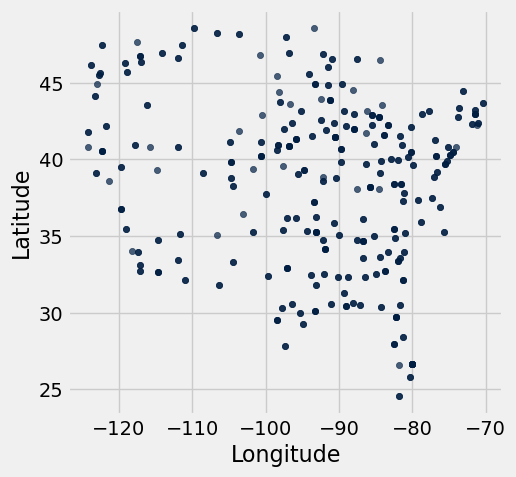

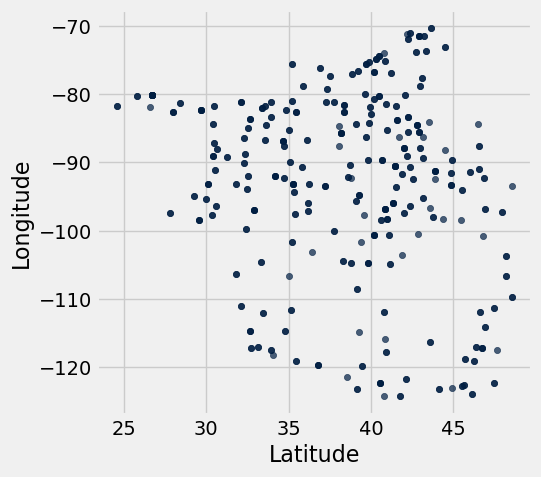

In [4]:
cities.scatter('Longitude','Latitude')
cities.scatter('Latitude','Longitude')

<!-- END QUESTION -->

These cities are all within the continental U.S., and so the general shape of the U.S. should be visible in your plot. The shape will appear distorted compared to most maps for two reasons: the scatter plot is square even though the U.S. is wider than it is tall, and this scatter plot is an [equirectangular projection](https://en.wikipedia.org/wiki/Equirectangular_projection) of the spherical Earth. A geographical map of the same data uses the common [Pseudo-Mercator projection](https://en.wikipedia.org/wiki/Web_Mercator_projection).

In [5]:
# Just run this cell
Marker.map_table(cities.select('Latitude', 'Longitude', 'Name').relabeled('Name', 'labels'))

<!-- BEGIN QUESTION -->

**Question 1.1.2** How do the city locations reflect the distribution of population centers and geographic diversity across the US?


This map has more pinpoints at regions that have historically high population densities, which means there is a bias towards urban and suburban areas. This bias is kind of expected as some areas have more human activities, more lucrative, and have better weather stations which can provide crucial data to monitor weather patterns or climate change. While there is a focus on highly populated areas, the map still includes atleast one pinpoint in nearly every state. Despite the urban bias, this data shows geographic diversity across the U.S. representing various climates and landscapes, including coastal, mountain, and the plains region. This broad coverage ensures that we have data from different environmental conditions, which is crucial for understanding regional climate patterns. 

<!-- END QUESTION -->

**Question 1.1.3:** Assign `unique_city_count` to the number of unique cities that appear in the `cities` table.


In [6]:
unique_city_count = cities.group('Name').num_rows

# Do not change this line
print(f"There are {unique_city_count} unique cities that appear within our dataset.")

There are 209 unique cities that appear within our dataset.


In [7]:
grader.check("q1_1_3")

q1_1_3 results: All test cases passed!

In order to investigate further, it will be helpful to determine what region of the United States each city was located in: Northeast, Northwest, Southeast, or Southwest. For our purposes, we will be using the following geographical boundaries:

<img src= "usa_coordinates.png" alt="USA Coordinate Map" width="600"/>

1. A station is located in the `"Northeast"` region if its latitude is above or equal to 37 degrees and its longtitude is greater than or equal to -100 degrees.
2. A station is located in the `"Northwest"` region if its latitude is above or equal to 37 degrees and its longtitude is less than -100 degrees.
3. A station is located in the `"Southeast"` region if its latitude is below 37 degrees and its longtitude is greater than or equal to -100 degrees.
4. A station is located in the `"Southwest"` region if its latitude is below 37 degrees and its longtitude is less than -100 degrees.

**Question 1.1.4**: Define the `region_coordinates` function below. It should take in two arguments, a city's latitude (`lat`) and longitude (`lon`) coordinates, and output a string representing the region it is located in.


In [8]:
def region_coordinates(lat, lon):
    if lat >= 37 and lon >= -100:
        return "Northeast"
    elif lat >= 37 and lon < -100:
        return "Northwest"
    elif lat < 37 and lon >= -100:
        return "Southeast"
    elif lat < 37 and lon < -100:
        return "Southwest"

In [9]:
grader.check("q1_1_4")

q1_1_4 results: All test cases passed!

**Question 1.1.5**: Add a new column in `cities` labeled `Area` that contains the region in which the city is located. For full credit, you must use the `region_coordinates` function you defined rather than reimplementing its logic.


In [10]:
area_array = cities.apply(region_coordinates, ['Latitude', 'Longitude'])
cities = cities.with_column('Area', area_array)
cities.show(5)

Name,ID,Latitude,Longitude,Stn.Name,Stn.stDate,Stn.edDate,Area
Cheyenne,USW00024018,41.1519,-104.806,CHEYENNE WBO,1871-01-01,1935-08-31,Northwest
Cheyenne,USW00024018,41.1519,-104.806,CHEYENNE MUNICIPAL ARPT,1935-09-01,2021-12-31,Northwest
Wausau,USW00014897,44.9258,-89.6256,Wausau Record Herald,1896-01-01,1941-12-31,Northeast
Wausau,USW00014897,44.9258,-89.6256,Wausau Airport,1942-01-01,2021-12-31,Northeast
Hayward,USW00094973,46.0261,-91.4442,Hayward RS,1894-01-01,1998-03-31,Northeast


In [11]:
grader.check("q1_1_5")

q1_1_5 results: All test cases passed!

To confirm that you've defined your `region_coordinates` function correctly and successfully added the `Area` column to the `cities` table, run the following cell. Each region should have a different color in the result.

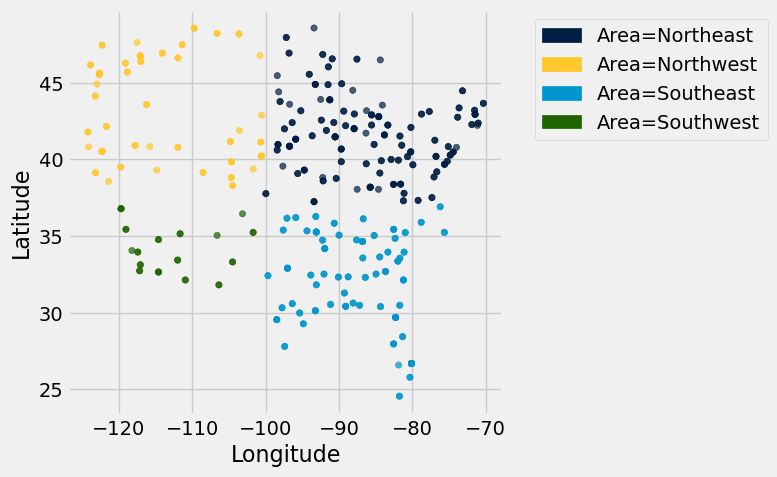

In [12]:
# Just run this cell
cities.scatter("Longitude", "Latitude", group="Area")

**Challenge Question 1.1.6 (OPTIONAL, ungraded)**: Create a new table called `cities_nearest`. It should contain the same columns as the `cities` table and an additional column called `"Nearest"` that contains the **name of the nearest city** that is in a different region from the city described by the row.

To approximate the distance between two cities, take the square root of the sum of the squared difference between their latitudes and the square difference between their longitudes. Don't use a `for` statement; instead, use the `apply` method and array arithmetic.

*Hint*: We have defined a `distance` function for you, which can be called on numbers `lat0` and `lon0` and arrays `lat1` and `lon1`.

### Part 1, Section 2: Welcome to Sacramento, California

Each city has a different CSV file full of daily temperature and precipitation measurements. The file for Sacramento, California is included with this project as `sacramento.csv`. The files for other cities can be downloaded [here](https://kilthub.cmu.edu/articles/dataset/Compiled_daily_temperature_and_precipitation_data_for_the_U_S_cities/7890488) by matching them to the ID of the city in the `cities` table.

Since Sacramento is the city located closest to the Bay Area, it is interesting to look at its temperatures.

Run the following cell to load in the `sacramento` table. It has one row per day and the following columns:

1. `"Date"`: The date (a string) representing the date of the recording in **YYYY-MM-DD** format
2. `"tmax"`: The maximum temperature for the  day (°F)
3. `"tmin"`: The minimum temperature for the day (°F)
4. `"prcp"`: The recorded precipitation for the day (inches)

In [13]:
sacramento = Table.read_table("sacramento.csv", index_col=0)
sacramento.show(10)

Date,tmax,tmin,prcp
1878-01-01,51,29,0
1878-01-02,50,31,0
1878-01-03,46,27,0
1878-01-04,46,28,0
1878-01-05,50,29,0
1878-01-06,48,33,0
1878-01-07,57,41,0.11
1878-01-08,61,49,0.04
1878-01-09,58,38,0
1878-01-10,57,45,0.38


**Question 1.2.1:** Assign the variable `highest_2020_average_temp` to the date of the **highest average temperature** in Sacramento, California for any day between January 1st, 2020 and December 31st, 2020. Your answer should be a string in the "YYYY-MM-DD" format. Feel free to use as many lines as you need. An average temperature is calculated as the sum of the max and min temperatures for the day divided by 2.

*Hint*: To limit the values in a column to only those that *contain* a certain string, pick the right `are.` predicate from the [Python Reference Sheet](http://data8.org/sp22/python-reference.html).

*Note:* Do **not** re-assign the `sacramento` variable; please use the `sacramento_with_averages_2020` variable instead.


In [14]:
sacramento_with_averages_2020 = sacramento.where('Date', are.containing('2020'))
avgs = (sacramento_with_averages_2020.column('tmax') + sacramento_with_averages_2020.column('tmin')) / 2
sacramento_with_averages_2020 = sacramento_with_averages_2020.with_column('average_temp', avgs)
highest_2020_average_date = str(sacramento_with_averages_2020.sort('average_temp', descending=True).row(0).item('Date'))
highest_2020_average_date

'2020-08-16'

In [15]:
grader.check("q1_2_1")

q1_2_1 results: All test cases passed!

We can look back to our `sacramento` table to check the temperature readings for our `highest_2020_average_date` to see if anything special is going on. Run the cell below to find the row of the `sacramento` table that corresponds to the date we found above. 

In [16]:
# Just run this cell
sacramento.where("Date", highest_2020_average_date)

Date,tmax,tmin,prcp
2020-08-16,111.9,80.1,0


ZOO WEE MAMA! Look at the maximum temperature for that day. That's hot. But not as hot as Sacramento's all-time high temperature reached on September 6, 2022 of 116 degrees!!

The function `get_month_from_date` takes a date string in the **YYYY-MM-DD** format and returns an integer representing the **month**. The function `get_year_from_date` takes a date string and returns a string describing the **year**. Run this cell, but you do not need to understand how this code works or edit it.

In [17]:
# Just run this cell
import calendar

def get_month_from_date(date):
    "Return an abbreviation of the name of the month for a string's date."
    month = date[5:7]
    return f'{month} ({calendar.month_abbr[int(date[5:7])]})'

def get_year_from_date(date):
    """Returns an integer corresponding to the year of the input string's date."""
    return int(date[:4])


# Example
print('2022-04-01 has month', get_month_from_date('2022-04-01'),
      'and year', get_year_from_date('2022-04-01'))

2022-04-01 has month 04 (Apr) and year 2022


**Question 1.2.2:** Add two new columns called `Month` and `Year` to the `sacramento` table that contain the month as a **string** (such as `"04 (Apr)"`) and the year as an **integer** for each day, respectively. 

*Note*: The functions above may be helpful!


In [18]:
months_array = sacramento.apply(get_month_from_date, 'Date')
years_array = sacramento.apply(get_year_from_date, 'Date')
sacramento = sacramento.with_columns(
    'Month', months_array,
    'Year', years_array
)
sacramento.show(5)

Date,tmax,tmin,prcp,Month,Year
1878-01-01,51,29,0,01 (Jan),1878
1878-01-02,50,31,0,01 (Jan),1878
1878-01-03,46,27,0,01 (Jan),1878
1878-01-04,46,28,0,01 (Jan),1878
1878-01-05,50,29,0,01 (Jan),1878


In [19]:
grader.check("q1_2_2")

q1_2_2 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 1.2.3:** A recent study has found that all species appear to thrive at an "optimal" 20 degrees (68 degrees Fahrenheit). Using the `sacramento` table, create a line plot of the **average number of days the maximum temperature was above 68 degrees** for each year between 1920 and 2021. 

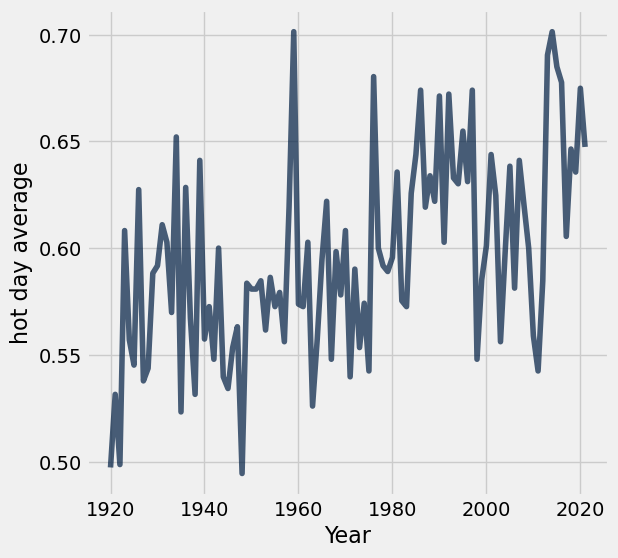

In [20]:
hot_day = sacramento.column('tmax') > 68
sacramento_hot = sacramento.with_column('hot day', hot_day)
hot_days_year = sacramento_hot.group('Year', np.average)
hot_days_year = hot_days_year.where('Year', are.between_or_equal_to(1920, 2021))
hot_days_year.plot('Year', 'hot day average')
#hot_days_year.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 1.2.4:** Although still hotly debated (pun intended), many climate scientists agree that the effects of climate change began to surface in the early 1960s as a result of elevated levels of greenhouse gas emissions. How does the graph you produced in Question 1.2.3 support the claim that modern-day global warming began in the early 1960s? 


My graph in Question 1.2.3 does accurately represent a result of elevated levels of greenhouse gas emissions because before the 1960's the level of hot day average was relatively stable, shifting from 0.55-0.60 but after 1960s the average shifted upwards, ranging between 0.55 and 0.70. Another factor that could contribute to the upward trend shown in the graph is the rise of human-induced greenhouse gas emissions. 

<!-- END QUESTION -->

Averaging temperatures across an entire year can obscure some effects of climate change. For example, if summers get hotter but winters get colder, the annual average may not change much. Let's investigate how average **monthly** minimum temperatures have changed over time in Sacramento. 

**Question 1.2.5:** Create a `monthly_differences` table with one row per month and the following four columns in order: 
1. `"Month"`: The month (such as `"02 (Feb)"`)
2. `"Past"`: The average min temperature in that month from 1900-1979 (inclusive)
3. `"Present"`: The average min temperature in that month from 2016-2021 (inclusive)
4. `"Increase"`: The difference between the present and past average min temperatures in that month

First make a copy of the `sacramento` table and add a new column containing the corresponding **category** for each row. You may find the `categorize` function helpful. Then, use this new table to construct `monthly_differences`. Feel free to use as many lines as you need.

*Hint*: What table method can we use to get each **unique value** as its own column? 

*Note*: Please do **not** re-assign the `sacramento` variable!


In [21]:
def categorize(year):
    "Output if a year is in the Past, Present, or Other."
    if 1900 <= year <= 1979:
        return "Past"
    elif 2016 <= year <= 2021:
        return "Present"
    else:
        return "Other"
sacramento_copy = sacramento.with_column('Category', sacramento.apply(categorize, 'Year'))    
past_avg = sacramento_copy.where('Category', 'Past').group('Month', np.average).select('Month', 'tmin average')
present_avg = sacramento_copy.where('Category', 'Present').group('Month', np.average).select('Month', 'tmin average')
monthly_differences = past_avg.join('Month', present_avg, 'Month').relabeled('tmin average', 'Past').relabeled('tmin average_2', 'Present')
increase = monthly_differences.column('Present') - monthly_differences.column('Past')
monthly_differences = monthly_differences.with_column('Increase', increase)
monthly_differences.show()


Month,Past,Present,Increase
01 (Jan),39.2873,43.1823,3.89493
02 (Feb),42.9863,43.2653,0.279029
03 (Mar),45.1371,46.2108,1.07362
04 (Apr),47.8696,50.8128,2.94321
05 (May),51.8269,55.1194,3.29248
06 (Jun),56.326,60.2772,3.95125
07 (Jul),58.6668,62.5075,3.84073
08 (Aug),58.0946,62.614,4.51936
09 (Sep),56.7178,59.8072,3.08942
10 (Oct),51.5401,52.6554,1.11525


In [22]:
grader.check("q1_2_5")

q1_2_5 results: All test cases passed!

### March in Sacramento

The `"Past"` column values are averaged over many decades, and so they are reliable estimates of the average high temperatures in those months before the effects of modern climate change. However, the `"Present"` column is based on only six years of observations. February, the shortest month, has the fewest total observations: only 170 days. Run the following cell to see this.

In [23]:
# Just run this cell
feb_present = sacramento.where('Year', are.between_or_equal_to(2016, 2021)).where('Month', '02 (Feb)')
feb_present.num_rows

170

Given February is a short month, we'll focus on the next closest value which is in March. Look back to your `monthly_differences` table. Compared to the other months, the increase for the month of March is the next smallest. Run the following cell to print out our observed difference.

In [24]:
# Just run this cell
mar_present = sacramento.where('Year', are.between_or_equal_to(2016, 2021)).where('Month', '03 (Mar)')
print(f"March Difference: {monthly_differences.row(2).item('Increase')}")

March Difference: 1.0736167658419546


Are March months really getting warmer (i.e., is the average minimum temperature increasing)? Perhaps that small difference is somehow due to chance! To investigate this idea requires a thought experiment.

We can observe all of the March minimum temperatures from 2016 to 2021 (the present period), so we have access to the census; there's no random sampling involved. But, we can imagine that if more years pass with the same present-day climate, there would be different but similar minimum temperatures in future March days. From the data we observe, we can try to estimate the **average minimum March temperature** in this imaginary collection of all future March days that would occur in our modern climate, assuming the climate doesn't change any further and many years pass.

We can also imagine that the minimum temperature each day is like a **random draw from a distribution of temperatures for that month**. Treating actual observations of natural events as if they were each *randomly* sampled from some unknown distribution is a simplifying assumption. These temperatures were not actually sampled at random—instead they occurred due to the complex interactions of the Earth's climate—but treating them as if they were random abstracts away the details of this naturally occuring process and allows us to carry out statistical inference.  Conclusions are only as valid as the assumptions upon which they rest, but in this case thinking of daily temperatures as random samples from some unknown climate distribution seems at least plausible.

If we assume that the **actual temperatures were drawn at random from some large population of possible March days** in our modern climate, then we can not only estimate the population average of this distribution, but also quantify our uncertainty about that estimate using a confidence interval.

**We will just compute the lower bound of this confidence interval.** The upper bound of a confidence interval for a population average based on a sample is always higher than the sample average. We intend to compare our confidence interval to the historical average (ie. the `Past` value in our `monthly_differences` table). In all months, the sample average we will consider (i.e. the `Present` value in our `monthly_differences` table) is higher than the historical average. As a result, we know in advance that the upper bound of the confidence interval will be higher as well, and there is no need to compute the upper bound explicitly. (But you can if you wish!)

**Question 1.2.6.** Complete the implementation of the function `ci_lower`, which takes a one-column table `t` containing sample observations and a confidence `level` percentage such as 95 or 99. It returns the lower bound of a confidence interval for the population mean constructed using 4,000 bootstrap resamples.

After defining `ci_lower`, we have provided a line of code that calls `ci_lower` on the present-day March min temperatures to output the upper bound of a 95% confidence interval for the March average min temperature. The result should be around 45.5 degrees.


In [25]:
def ci_lower(t, level):
    """Compute an upper bound of a level% confidence interval of the 
    average of the population for which column 0 of Table t contains a sample.
    """
 
    stats = make_array()
    for k in np.arange(4000):
        sample = t.sample()
        stat = np.mean(sample.column(0))
        stats = np.append(stats, stat)
    lower_bound = np.percentile(stats, (100 - level) / 2) 
    return lower_bound
# Call ci_lower on the max temperatures in present-day February to find the lower bound of a 95% confidence interval.
mar_present_ci = ci_lower(mar_present.select('tmin'), 95)
mar_present_ci

45.507486559139785

In [26]:
grader.check("q1_2_6")

q1_2_6 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 1.2.7** The lower bound of the `mar_present_ci` 95% confidence interval is above the observed past March average minimum temperature of 42.9863 (from the `monthly_increases` table). What conclusion can you draw about the effect of climate change on March minimum temperatures in Sacramento from this information? Use a 5% p-value cutoff.

*Note*: If you're stuck on this question, re-reading the paragraphs under the *March* heading (particularly the first few) may be helpful.


Using a 5% p-value cutoff, we can make a conclusion that the increase in March minimum temperature is statistically significant. This is because the lower bound of confidence interval in Sacramento is 45.51 degrees, which is higher than the average March minimum temperature of 42.9863 degrees. This shows that the average March minimum temperature is outside of our confidence interval, which suggests that this cause is unlikely to be due to random variation, potentially due to climate change. This means that we reject the null hypothesis and have evidence that March minimum temperatures have increased significantly over time.

<!-- END QUESTION -->

### All Months

**Question 1.2.8.** Repeat the process of comparing the **lower bound of a 95% confidence interval** to the **past average** for each month. For each month, print out the name of the month (e.g., `03 (Mar)`), the observed past average, and the lower bound of a confidence interval for the present average.

Use the provided call to `print` in order to format the result as one line per month.

*Hint*: Your code should follow the same format as our code from above (i.e. the *March* section).   


In [27]:
comparisons = make_array()
months = np.array(['01 (Jan)', '02 (Feb)', '03 (Mar)', '04 (Apr)', '05 (May)', '06 (Jun)', 
          '07 (Jul)', '08 (Aug)', '09 (Sep)', '10 (Oct)', '11 (Nov)', '12 (Dec)'])
for month in months:
    past_average = monthly_differences.where('Month', month).column('Past').item(0)
    present_averages = sacramento.where('Year', are.between_or_equal_to(2016, 2021)).where('Month', month)
    present_lower_bound = ci_lower(present_averages.select('tmin'), 95)
    
    # Do not change the code below this line
    below = past_average < present_lower_bound
    if below:
        comparison = '**below**'
    else:
        comparison = '*above*'
    comparisons = np.append(comparisons, comparison)
    
    print('For', month, 'the past avg', round(past_average, 1), 
          'is', comparison, 
          'the lower bound', round(present_lower_bound, 1),
          'of the 95% CI of the present avg. \n')

For 01 (Jan) the past avg 39.3 is **below** the lower bound 42.5 of the 95% CI of the present avg. 

For 02 (Feb) the past avg 43.0 is *above* the lower bound 42.5 of the 95% CI of the present avg. 

For 03 (Mar) the past avg 45.1 is **below** the lower bound 45.5 of the 95% CI of the present avg. 

For 04 (Apr) the past avg 47.9 is **below** the lower bound 50.2 of the 95% CI of the present avg. 

For 05 (May) the past avg 51.8 is **below** the lower bound 54.5 of the 95% CI of the present avg. 

For 06 (Jun) the past avg 56.3 is **below** the lower bound 59.6 of the 95% CI of the present avg. 

For 07 (Jul) the past avg 58.7 is **below** the lower bound 62.0 of the 95% CI of the present avg. 

For 08 (Aug) the past avg 58.1 is **below** the lower bound 61.9 of the 95% CI of the present avg. 

For 09 (Sep) the past avg 56.7 is **below** the lower bound 59.1 of the 95% CI of the present avg. 

For 10 (Oct) the past avg 51.5 is **below** the lower bound 51.9 of the 95% CI of the present

In [28]:
grader.check("q1_2_8")

q1_2_8 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 1.2.9.** Summarize your findings. After comparing the past average to the 95% confidence interval's lower bound for each month, what conclusions can we make about the monthly average minimum temperature in historical (1900-1979) vs. modern (2016-2021) times in the twelve months? In other words, what null hypothesis should you consider, and for which months would you reject or fail to reject the null hypothesis? Use a 5% p-value cutoff.


We can reject the null hypothesis because 11 out of the 12 months showed a significant increase in the average minimum temperature in 2016-2021 compared to the past averages (1900-1979). Out of the 12 months, I would reject the null hypothesis in every month but February because the historical average was above the lower bound of the 95% confidence interval, This means we failed to reject the null hypothesis for that month.

<!-- END QUESTION -->

### Congratulations

Congratulations, you made it this far!


--- 
The cell below will re-run all of the autograder tests for Part 1 to double check your work.

In [29]:
checkpoint_tests = ["q1_1_3", "q1_1_4", "q1_1_5",
                    "q1_2_1", "q1_2_2", "q1_2_5", "q1_2_6", "q1_2_8"]

for test in checkpoint_tests:
    display(grader.check(test))

q1_1_3 results: All test cases passed!

q1_1_4 results: All test cases passed!

q1_1_5 results: All test cases passed!

q1_2_1 results: All test cases passed!

q1_2_2 results: All test cases passed!

q1_2_5 results: All test cases passed!

q1_2_6 results: All test cases passed!

q1_2_8 results: All test cases passed!

## Submission
If your instructor would like you to submit the work in part one as a checkpoint to the project, follow the instructions below.

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

Your instructor may want you to submit your work thus far as a checkpoint.

**Reminders**:
- Make sure to wait until the autograder finishes running to ensure that your submission was processed properly and that you submitted to the correct assignment.

In [30]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)

# Part 2: Drought

California is no stranger to drought; it is a recurring feature of our climate. According to the [California Department of Water Resources](https://water.ca.gov/water-basics/drought#:~:text=We%20recently%20experienced%20the%205,in%20the%201920s%20and%201930s.), California experienced drought periods from 2007-2009 and from 2012-2016. 

Let's look back at the Sacramento dataset, and consider the precipitation data. The `sacramento.csv` contains precipitation for each year since 1878. We will read in the original dataset again and name the file precipitation since we will be focusing on the precipitation. You may recall that "prcp" is the recorded precipitation for the day (inches). Run the cell below to look at the current sacramento dataset.

In [31]:
sacramento.show(5)

Date,tmax,tmin,prcp,Month,Year
1878-01-01,51,29,0,01 (Jan),1878
1878-01-02,50,31,0,01 (Jan),1878
1878-01-03,46,27,0,01 (Jan),1878
1878-01-04,46,28,0,01 (Jan),1878
1878-01-05,50,29,0,01 (Jan),1878


**Question 2.1.** The Sacramento dataset only has consistent precipitation data since 1960. Create a table `averages` that has one row for each year since 1960 (inclusive) in chronological order. It should contain the following columns:
1. `"Year"`: The year (a number)
2. `"Total Precipitation"`: The total precipitation in Sacramento that year


In [32]:
total_precip = sacramento.where('Year', are.above_or_equal_to(1960)).group('Year', sum).select('Year', 'prcp sum').relabeled('prcp sum', 'Total Precipitation')
total_precip

Year,Total Precipitation
1960,14.53
1961,11.57
1962,19.88
1963,18.97
1964,15.07
1965,15.63
1966,13.69
1967,19.63
1968,15.28
1969,26.06


In [33]:
grader.check("q2_1")

q2_1 results: All test cases passed!

Run the cell below to plot the total precipitation in Sacramento over time, so that we can try to spot the drought visually. Pay careful attention to the drought years (2007-2009) and (2012-2016) identified by the CA Dept of Water Resources.

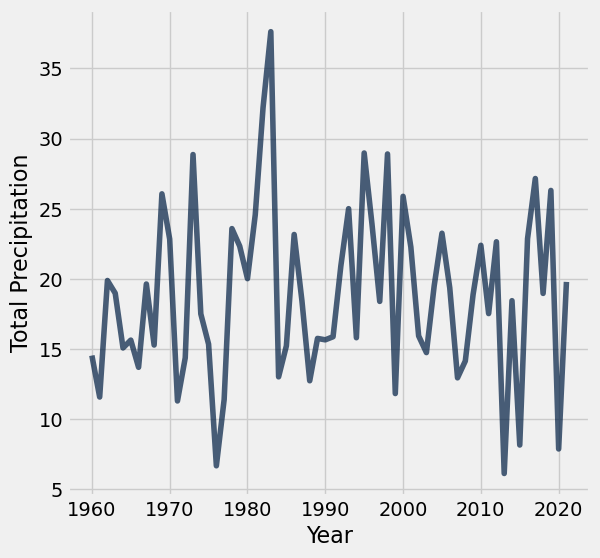

In [34]:
# Just run this cell
total_precip.plot('Year', 'Total Precipitation')

This plot isn't very revealing. Each year has a different amount of precipitation, and there is quite a bit of variability across years, as if each year's precipitation is a random draw from a distribution of possible outcomes. 

Could it be that these so-called "drought conditions" from 2007-2009 and 2012-2016 can be explained by chance? In other words, could it be that the annual precipitation amounts in Sacramento for these drought years are like **random draws from the same underlying distribution** as for other years? Perhaps nothing about the Earth's precipitation patterns has really changed, and Sacramento just happened to experience a few dry years close together. 

To assess this idea, let's conduct an A/B test in which **each year's total precipitation** is an outcome, and the condition is **whether or not the year is in the CA Water Department's drought period**.

This `precip_label` function distinguishes between drought years as described by the CA Water Department above (2007-2009 and 2012-2016) and other years. Note that the label "other" is perhaps misleading, since there were other droughts before 2007, such as the massive [1988 drought](https://en.wikipedia.org/wiki/1988%E2%80%9390_North_American_drought) that affected much of the U.S. However, if we're interested in whether these modern drought periods (2007-2009 and 2012-2016) are *normal* or *abnormal*, it makes sense to distinguish the years in this way. 

In [35]:
def precip_label(n):
    """Return the label for an input year n."""
    if 2007 <= n <= 2009 or 2012 <= n <= 2016:
        return 'drought'
    else:
        return 'other'

<!-- BEGIN QUESTION -->

**Question 2.2.** Define null and alternative hypotheses for an A/B test that investigates whether drought years are drier (have less precipitation) than other years.

*Note:* Please format your answer using the following structure.

- *Null hypothesis:* ...
- *Alternative hypothesis:* ...


Null hypothesis: There is no difference in total precipitation between drought years and other years. 
Alternative hypothesis: Drought years have significantly less precipitation than other years. 

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 2.3.** First, define the table `precip`. It should contain one row per year and the following two columns:
- `"Label"`: Denotes if a year is part of a `"drought"` year or an `"other"` year
- `"Total Precipitation"`: The total precipitation in Sacramento that year

Then, construct an overlaid histogram of two observed distributions: the total precipitation in drought years and the total precipitation in other years. 

*Note*: Use the provided `bins` when creating your histogram, and do not re-assign the `sacramento` table. Feel free to use as many lines as you need!

*Hint*: The optional `group` argument in a certain function might be helpful!


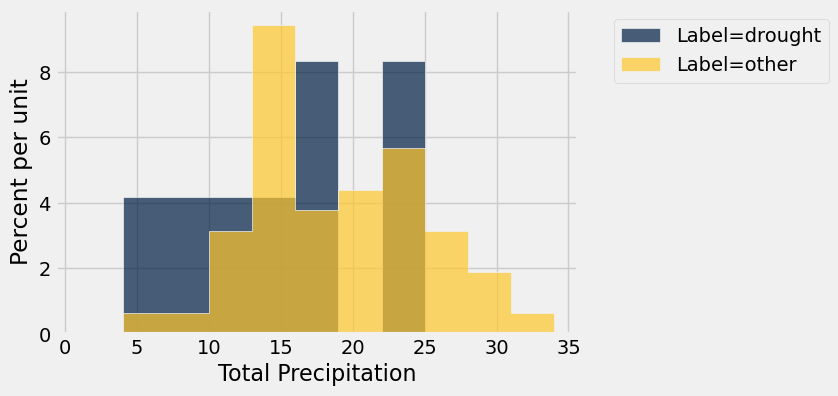

In [36]:
drought_years = [2007, 2008, 2009, 2012, 2013, 2014, 2015, 2016]
avg = sacramento.where("Year", are.above_or_equal_to(1960)).group("Year", sum).select("Year", "prcp sum").relabeled("prcp sum", "Total Precipitation")
precip = avg.with_column(
    "Label",
    avg.apply(lambda y: "drought" if y in drought_years else "other", "Year")
).select("Label", "Total Precipitation")
bins = np.arange(1, 35, 3)
precip.hist("Total Precipitation", group="Label", bins=bins, overlay=True)

<!-- END QUESTION -->

Before you continue, inspect the histogram you just created and try to guess the conclusion of the A/B test. Building intuition about the result of hypothesis testing from visualizations is quite useful for data science applications. 

**Question 2.4.** Our next step is to choose a test statistic based on our alternative hypothesis in Question 2.2. Which of the following options are valid choices for the test statistic? Assign `ab_test_stat` to an array of integers corresponding to valid choices. Assume averages and totals are taken over the total precipitation sums for each year.

1. The **absolute** difference between the **total** precipitation in others years and the **total** precipitation in drought years.
2. The **total** precipitation in **drought** years.
3. The difference between the **total** precipitation in **others** years and the **total** precipitation in **drought** years.
4. The **average** precipitation in **drought** years.
5. The **absolute** difference between the **total** precipitation in others years and the **total** precipitation in drought years.
6. The difference between the **average** precipitation in **drought** years and the **average** precipitation in **other** years.


In [37]:
ab_test_stat = make_array(3,6)

In [38]:
grader.check("q2_4")

q2_4 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 2.5.** Fellow climate scientists Jim and Tisha point out that there are more **other** years than **drought** years, and we should disregard the **other** years because they are skewing the data. They conclude the only valid test statistic is the **total** precipitation in drought years. Do you agree with them? Why or why not?


I do not agree with Jim and Tisha because disregarding the data would make the analysis inaccurate. It would introduce bias by ignoring a significant portion of the data, making it impossible to make a fair comparison between drought and non-drought years.

<!-- END QUESTION -->

Before going on, check your `precip` table. It should have two columns `Label` and `Total Precipitation` with 62 rows, 8 of which are for `"drought"` years.

In [39]:
precip.show(5)

Label,Total Precipitation
other,14.53
other,11.57
other,19.88
other,18.97
other,15.07


In [40]:
precip.group('Label')

Label,count
drought,8
other,54


**Question 2.6.** For our A/B test, we'll use the difference between the average precipitation in drought years and the average precipitation in other years as our test statistic:

$$\text{average precipitation in "drought" years} - \text{average precipitation in "other" years}$$

First, complete the function `test_stat`. It should take in a two-column table `t` with one row per year and two columns:
- `Label`: the label for that year (either `'drought'` or `'other'`)
- `Total Precipitation`: the total precipitation in Sacramento that year. 

Then, use the function you define to assign `observed_stat` to the observed test statistic.


In [41]:
def test_stat(t):
    drought_avg = t.where("Label", "drought").column("Total Precipitation").mean()
    other_years_avg = t.where("Label", "other").column("Total Precipitation").mean()
    return drought_avg - other_years_avg
observed_stat = test_stat(precip)
observed_stat

-3.7989351851851865

In [42]:
grader.check("q2_6")

q2_6 results: All test cases passed!

Now that we have defined our hypotheses and test statistic, we are ready to conduct our hypothesis test. We’ll start by defining a function to simulate the test statistic under the null hypothesis, and then call that function 4,000 times to construct an empirical distribution under the null hypothesis.

**Question 2.7.** Write a function to simulate the test statistic under the null hypothesis. The `simulate_null` function should simulate the null hypothesis once (not 4,000 times) and return the value of the test statistic for that simulated sample.

*Hint*: Using `t.with_column(...)` with a column name that already exists in a table `t` will replace that column with the newly specified values.


In [43]:
def simulate_null():
    shuffled_labels = precip.sample(with_replacement=False).column("Label")
    shuffled_table = precip.with_column("Label", shuffled_labels)
    null_stat = test_stat(shuffled_table)
    return null_stat
# Run your function a couple times to make sure that it works
simulate_null()

-0.73050925925926435

In [44]:
grader.check("q2_7")

q2_7 results: All test cases passed!

**Question 2.8.** Fill in the blanks below to complete the simulation for the hypothesis test. Your simulation should compute 4,000 values of the test statistic under the null hypothesis and store the result in the array `simulated_values`.

*Hint:* You should use the `simulate_null` function you wrote in the previous question!

*Note:* Running this cell may take a few seconds. If it takes more than a minute, try to find a faster way to implement your `simulate_null` function.


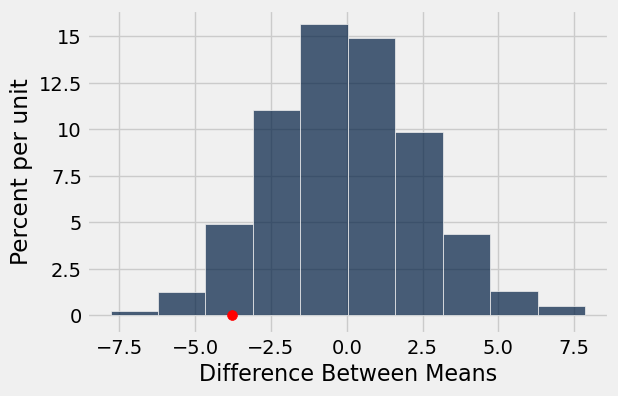

In [45]:
simulated_values = make_array()

repetitions = 4000
for i in np.arange(repetitions):
    null_stat = simulate_null()
    simulated_values = np.append(simulated_values, null_stat)
# Do not change these lines
Table().with_column('Difference Between Means', simulated_values).hist()
plt.scatter(observed_stat, 0, c="r", s=50);
plt.ylim(-0.01);

In [46]:
grader.check("q2_8")

q2_8 results: All test cases passed!

**Question 2.9.** Compute the p-value for this hypothesis test, and assign it to the variable `p_value`.


In [47]:
p_value = np.count_nonzero((simulated_values) <= observed_stat) / len(simulated_values)
p_value

0.05275

In [48]:
grader.check("q2_9")

q2_9 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 2.10.** State a conclusion from this test using a p-value cutoff of 1%. What have you learned about the CA Water Department's statement on drought?


We fail to reject the null hypothesis because the p-value is 0.05275, which is higher than the 1% significance level. In hypothesis testing, if the p-value is greater than the significance level, we fail to reject the null hypothesis. A p-value of 0.05275 indicates a 5.275% chance that the observed difference could occur due to random chance, suggesting that there is no significant difference between drought and non-drought years. I've learned that the CA Water Department's statement that drought years are not significantly drier than other years.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 2.11.** Does your conclusion from Question 2.10 apply to the entire state of California? Why or why not?


No, my conclusion from 2.10 does not apply to the entire state of California because this data only applies to Sacramento. In order to accurately find the precipitation for the entire state of California, we would need data from multiple regions across California. This ensures we would have a more accurate representation of the state's overall precipitation. 

<!-- END QUESTION -->

# Conclusion

Data science plays a central role in climate change research because massive simulations of the Earth's climate are necessary to assess the implications of climate data recorded from weather stations, satellites, and other sensors. [Berkeley Earth](http://berkeleyearth.org/data/) is a common source of data for these kinds of projects.

In this project, we found ways to apply our statistical inference technqiues that rely on random sampling even in situations where the data were not generated randomly, but instead by some complicated natural process that appeared random. We made assumptions about randomness and then came to conclusions based on those assumptions. Great care must be taken to choose assumptions that are realistic, so that the resulting conclusions are not misleading. However, making assumptions about data can be productive when doing so allows inference techniques to apply to novel situations.

**Congratulations on finishing Project 2! Time to submit.**

**Important submission steps:** 
1. Run the tests and verify that they all pass.
2. Choose **Save Notebook** from the **File** menu, then **run the final cell**. 
3. Click the link to download the zip file.
4. Then submit the zip file to the corresponding assignment according to your instructor's directions. 

**It is your responsibility to make sure your work is saved before running the last cell.**

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [49]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False, run_tests=True)

Running your submission against local test cases...


Your submission received the following results when run against available test cases:

    q1_1_3 results: All test cases passed!

    q1_1_4 results: All test cases passed!

    q1_1_5 results: All test cases passed!

    q1_2_1 results: All test cases passed!

    q1_2_2 results: All test cases passed!

    q1_2_5 results: All test cases passed!

    q1_2_6 results: All test cases passed!

    q1_2_8 results: All test cases passed!

    q2_1 results: All test cases passed!

    q2_4 results: All test cases passed!

    q2_6 results: All test cases passed!

    q2_7 results: All test cases passed!

    q2_8 results: All test cases passed!

    q2_9 results: All test cases passed!
